In [52]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [53]:

import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [55]:
## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 32
learning_rate = 0.0003 ## 0.0003
N_Epochs      = 1000

epsilon = 0.0001

In [56]:
path_data = '/heart.csv'

HEART_raw_data = pd.read_csv( path_data, delimiter="," )

In [57]:
HEART_raw_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [58]:
headers_list = HEART_raw_data.columns.values.tolist()

headers_list

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [59]:
headers_list2 = [ 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

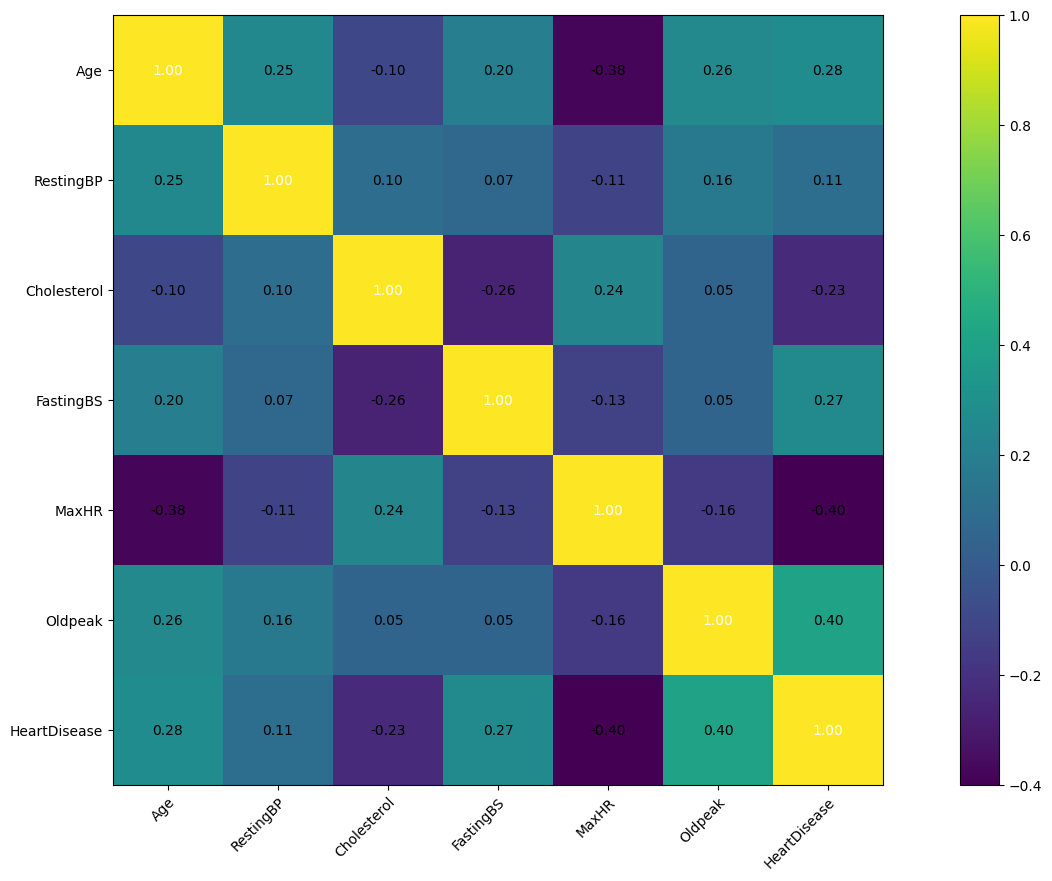

In [60]:
numerical_headers = HEART_raw_data.select_dtypes(include=np.number).columns.tolist()

cm = np.corrcoef(   HEART_raw_data[numerical_headers].values.T   )
hm = heatmap(cm, row_names=numerical_headers, column_names=numerical_headers, figsize=(20,10))
plt.show()

In [61]:
HEART_raw_data_np = HEART_raw_data.to_numpy()

In [62]:
HEART_raw_data_np

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

In [63]:
HEART_raw_data_np.shape

(918, 12)

In [64]:
# Get the list of numerical headers.
# The `numerical_headers` variable was created in cell `0fxd3bGpnZk3`.

# Define X using numerical columns, excluding 'HeartDisease'
X_cols = [col for col in numerical_headers if col != 'HeartDisease']
X = HEART_raw_data[X_cols].to_numpy()

# Define y as 'HeartDisease'
y = HEART_raw_data[['HeartDisease']].to_numpy()

In [65]:
y

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [66]:
y = y.astype(int)

In [67]:
y

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [68]:
the_set = np.unique(y)

the_set

array([0, 1])

In [69]:
len(  the_set  )

2

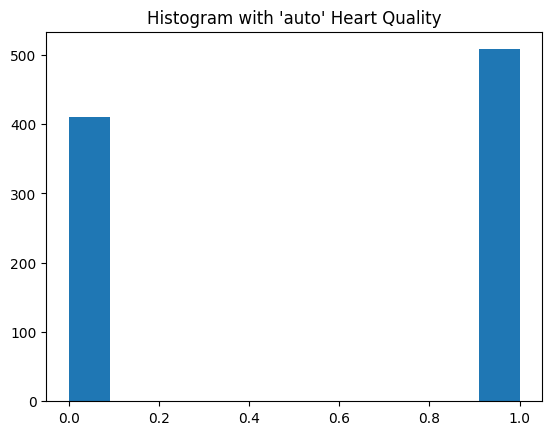

In [159]:
_ = plt.hist(y, bins='auto')

plt.title("Histogram with 'auto' Heart Quality")

plt.show()

In [71]:
print(X.shape)

print(y.shape)

(918, 6)
(918, 1)


In [72]:
random_seed = int( random.random() * 100 )     ## 42

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 6)
(184, 6)
(734, 1)
(184, 1)


In [75]:
X_test.dtype

dtype('float64')

In [76]:

y_test.dtype

dtype('int64')

In [77]:
## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.int64 )       ## np.long
y_test  = y_test.astype(   np.int64 )

In [78]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [79]:
x_means      = X_train_tr.mean(0, keepdim=True )

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [80]:
x_means

tensor([[ 53.1758, 132.2193, 197.4537,   0.2248, 136.9550,   0.8887]])

In [81]:
x_deviations

tensor([[  9.3058,  17.9467, 109.8733,   0.4178,  25.8132,   1.0850]])

In [82]:
X_train.shape[0]

734

In [83]:
label_map         = { 0:0, 1:1 }
reverse_label_map = { 0:0, 1:1 }

In [84]:
HEART_train_list = [  ( X_train_tr[i], label_map[ y_train_tr[i].item() ] )  for i in range( X_train.shape[0] ) ]

HEART_test_list  = [  ( X_test_tr[i],  label_map[ y_test_tr[i].item()  ] )  for i in range( X_test.shape[0] ) ]

In [85]:
train_dl = torch.utils.data.DataLoader(HEART_train_list, batch_size=batch_size, shuffle=True)

In [86]:
all_test_data = X_test.shape[0]

test_dl  = torch.utils.data.DataLoader(HEART_test_list,  batch_size=all_test_data, shuffle=True)

In [87]:
train_dl

In [88]:
## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(6, 5) # Changed input features from 11 to 6
        self.act1    = nn.ReLU()   ## nn.Sigmoid()
        self.linear2 = nn.Linear(5, 2) # Changed output features from 7 to 2 (for 2 classes)
        self.act2    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)


    ## perform inference
    def forward(self, x):

        ## x      = (x - self.x_means) / self.x_deviations

        x      = self.linear1(x)
        x      = self.act1(x)
        ## x      = self.dropout(x)
        x      = self.linear2(x)
        y_pred = self.act2(x)

        return y_pred

In [89]:
## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):

    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(6, 10) # Changed input features from 11 to 6, adjusted hidden size
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(10, 5) # Adjusted hidden size
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(5, 2) # Changed output features from 7 to 2 (for 2 classes)
        self.act3    = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x      = (x - self.x_means) / self.x_deviations

        x      = self.linear1(x)
        x      = self.act1(x)
        x      = self.dropout(x)
        x      = self.linear2(x)
        x      = self.act2(x)
        x      = self.dropout(x)
        x      = self.linear3(x)
        y_pred = self.act3(x)

        return y_pred

In [90]:
def training_loop( N_Epochs, model, loss_fn, opt  ):

    for epoch in range(N_Epochs):
        for xb, yb in train_dl:

            ## yb = torch.squeeze(yb, dim=1)

            y_pred = model(xb)
            ## print(    yb.shape   )
            ## print( y_pred.shape  )
            loss   = loss_fn(y_pred, yb)

            opt.zero_grad()
            loss.backward()
            opt.step()

        if epoch % 10 == 0: # Changed from 50 to 10 for quicker updates
            print(epoch, "loss=", loss)

In [91]:
model      = MLP_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(0.8466, grad_fn=<NllLossBackward0>)
10 loss= tensor(0.7133, grad_fn=<NllLossBackward0>)
20 loss= tensor(0.8799, grad_fn=<NllLossBackward0>)
30 loss= tensor(0.6799, grad_fn=<NllLossBackward0>)
40 loss= tensor(0.8799, grad_fn=<NllLossBackward0>)
50 loss= tensor(0.6133, grad_fn=<NllLossBackward0>)
60 loss= tensor(0.8799, grad_fn=<NllLossBackward0>)
70 loss= tensor(0.7799, grad_fn=<NllLossBackward0>)
80 loss= tensor(0.7799, grad_fn=<NllLossBackward0>)
90 loss= tensor(0.7133, grad_fn=<NllLossBackward0>)
100 loss= tensor(0.7466, grad_fn=<NllLossBackward0>)
110 loss= tensor(0.8466, grad_fn=<NllLossBackward0>)
120 loss= tensor(0.8133, grad_fn=<NllLossBackward0>)
130 loss= tensor(0.8133, grad_fn=<NllLossBackward0>)
140 loss= tensor(0.9133, grad_fn=<NllLossBackward0>)
150 loss= tensor(0.8799, grad_fn=<NllLossBackward0>)
160 loss= tensor(0.7466, grad_fn=<NllLossBackward0>)
170 loss= tensor(0.8799, grad_fn=<NllLossBackward0>)
180 loss= tensor(0.8466, grad_fn=<NllLossBackward0>)
190 

In [93]:
def print_metrics_function(y_test, y_pred):
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print("Confusion Matrix:")
    print(confmat)
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, average='weighted'))
    print('F1-measure: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, average='weighted'))

In [94]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.61
Confusion Matrix:
[[  0  72]
 [  0 112]]
Precision: 0.371
Recall: 0.609
F1-measure: 0.461


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Core Functions for Deep Learning


In [95]:
model      = DL_Net( x_means, x_deviations  )

opt        = torch.optim.Adam(    model.parameters(), lr=learning_rate )

## the y_test data can be integers and does not need to be one hot encoded with this function
loss_fn    = nn.CrossEntropyLoss( )

training_loop(  N_Epochs, model, loss_fn, opt  )


0 loss= tensor(0.6834, grad_fn=<NllLossBackward0>)
10 loss= tensor(0.6766, grad_fn=<NllLossBackward0>)
20 loss= tensor(0.6479, grad_fn=<NllLossBackward0>)
30 loss= tensor(0.6111, grad_fn=<NllLossBackward0>)
40 loss= tensor(0.5353, grad_fn=<NllLossBackward0>)
50 loss= tensor(0.5134, grad_fn=<NllLossBackward0>)
60 loss= tensor(0.5755, grad_fn=<NllLossBackward0>)
70 loss= tensor(0.5483, grad_fn=<NllLossBackward0>)
80 loss= tensor(0.4846, grad_fn=<NllLossBackward0>)
90 loss= tensor(0.5561, grad_fn=<NllLossBackward0>)
100 loss= tensor(0.4724, grad_fn=<NllLossBackward0>)
110 loss= tensor(0.5994, grad_fn=<NllLossBackward0>)
120 loss= tensor(0.5698, grad_fn=<NllLossBackward0>)
130 loss= tensor(0.4705, grad_fn=<NllLossBackward0>)
140 loss= tensor(0.5198, grad_fn=<NllLossBackward0>)
150 loss= tensor(0.5882, grad_fn=<NllLossBackward0>)
160 loss= tensor(0.6346, grad_fn=<NllLossBackward0>)
170 loss= tensor(0.5490, grad_fn=<NllLossBackward0>)
180 loss= tensor(0.4681, grad_fn=<NllLossBackward0>)
190 

In [96]:
with torch.no_grad():
    for x_real, y_real in test_dl:
        ## batch_size = imgs.shape[0]
        y_pred = model(  x_real  )
        vals, indeces = torch.max( y_pred, dim=1  )
        preds = indeces
        print_metrics_function(y_real, preds)

Accuracy: 0.79
Confusion Matrix:
[[60 12]
 [27 85]]
Precision: 0.803
Recall: 0.788
F1-measure: 0.790


Regression


In [97]:
import numpy as np
import torch
import pandas as pd
import sklearn
import random

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [98]:
import matplotlib.pyplot as plt

from mlxtend.plotting import heatmap
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## coefficient of determination
from sklearn.metrics import r2_score

In [99]:
import xgboost as xgb

In [5]:
!pip install onnxmltools
!pip install onnxruntime

In [139]:
!pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 10.9 MB/s eta 0:00:00


In [101]:
import onnxruntime as rt
import onnxmltools

from skl2onnx.common.data_types import FloatTensorType

In [102]:
## 0.001, 0.0001, 0.0003, 0.01, 0.03

batch_size    = 16
learning_rate = 0.005 ## 0.001
N_Epochs      = 100

epsilon = 0.0001

In [103]:
path_data = '/heart.csv'

HEART_raw_data = pd.read_csv( path_data, delimiter=";" )
HEART_raw_data = pd.read_csv( path_data, sep=",")

In [104]:
HEART_raw_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [105]:
headers_list = HEART_raw_data.columns.values.tolist()

headers_list

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [106]:
headers_list2 = [
    'PatientAge',
    'Gender',
    'ChestPainType',
    'RestingBloodPressure',
    'Cholesterol',
    'FastingBloodSugar',
    'RestingECG',
    'MaxHeartRate',
    'ExerciseInducedAngina',
    'STDepression',
    'STSlope',
    'HeartDisease'
]

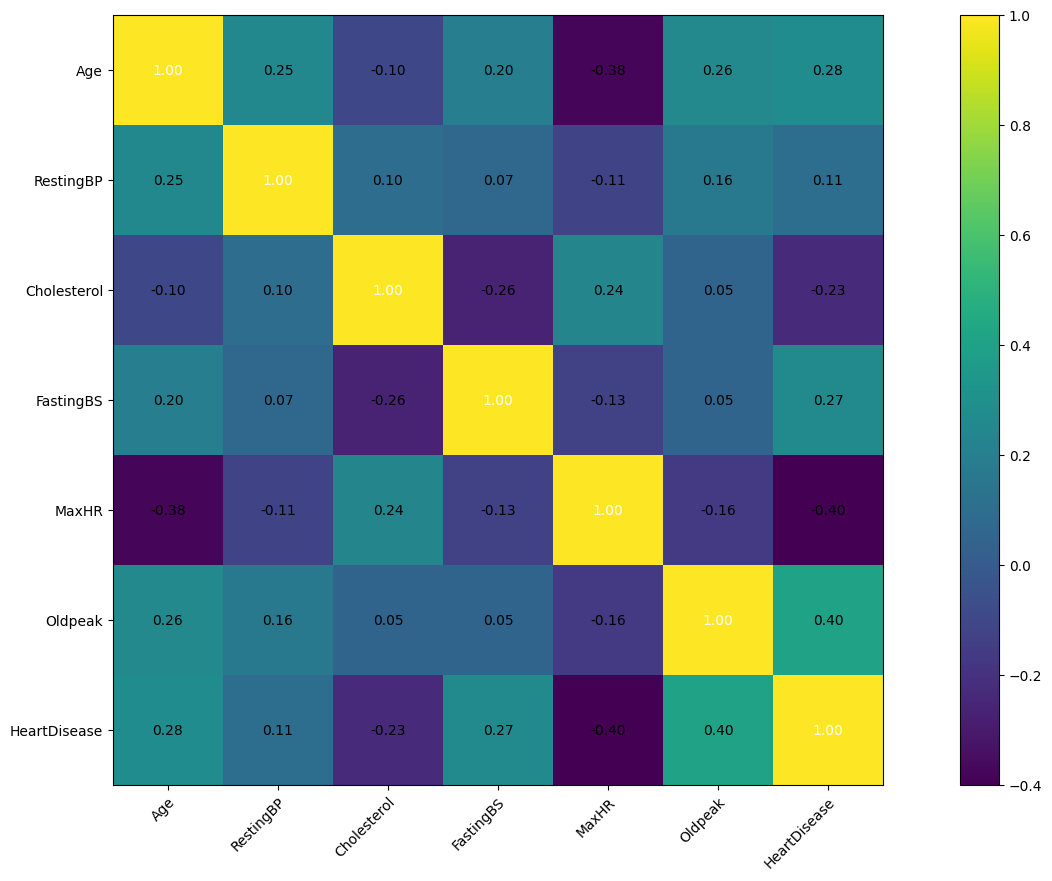

In [107]:
cm = np.corrcoef(   HEART_raw_data[numerical_headers].values.T   )
hm = heatmap(cm, row_names=numerical_headers, column_names=numerical_headers, figsize=(20,10))
plt.show()

In [108]:
## Convert Pandas to Numpy

HEART_raw_data_np = HEART_raw_data.to_numpy()

In [109]:
HEART_raw_data_np

array([[40, 'M', 'ATA', ..., 0.0, 'Up', 0],
       [49, 'F', 'NAP', ..., 1.0, 'Flat', 1],
       [37, 'M', 'ATA', ..., 0.0, 'Up', 0],
       ...,
       [57, 'M', 'ASY', ..., 1.2, 'Flat', 1],
       [57, 'F', 'ATA', ..., 0.0, 'Flat', 1],
       [38, 'M', 'NAP', ..., 0.0, 'Up', 0]], dtype=object)

In [110]:
HEART_raw_data_np.shape

(918, 12)

In [111]:
# Select numerical columns for X, excluding the target 'HeartDisease'
X_cols_regression = [col for col in numerical_headers if col != 'HeartDisease']
X = HEART_raw_data[X_cols_regression].values

# Select 'HeartDisease' as the target variable y
y = HEART_raw_data[['HeartDisease']].values

In [112]:
y

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [113]:
print(X.shape)

print(y.shape)

(918, 6)
(918, 1)


In [114]:
random_seed = int( random.random() * 100 )     ## 42

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [116]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 6)
(184, 6)
(734, 1)
(184, 1)


In [117]:
y_test.dtype

dtype('int64')

In [118]:
## fix data type

X_train = X_train.astype(  np.float32  )
X_test  = X_test.astype(   np.float32  )
y_train = y_train.astype(  np.float32  )
y_test  = y_test.astype(   np.float32  )

In [119]:
X_train_tr = torch.from_numpy(X_train)
X_test_tr  = torch.from_numpy(X_test)
y_train_tr = torch.from_numpy(y_train)
y_test_tr  = torch.from_numpy(y_test)

In [120]:
x_means      = X_train_tr.mean(0, keepdim=True )

x_deviations = X_train_tr.std( 0, keepdim=True) + epsilon

In [121]:
x_means

tensor([[ 53.5082, 132.3283, 202.3610,   0.2275, 136.0681,   0.9217]])

In [122]:
x_deviations

tensor([[  9.5221,  18.4920, 107.4962,   0.4196,  25.4158,   1.0800]])

In [123]:
train_ds = TensorDataset( X_train_tr, y_train_tr  )

In [124]:
train_dl = DataLoader( train_ds, batch_size, shuffle=True  )

In [125]:
train_dl

In [126]:
## Linear Regression

class LinRegNet(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(11, 1)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        y_pred = self.linear1(x)
        ## return torch.round( y_pred )
        return y_pred


In [127]:
## MLP

class MLP_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(11, 8)
        self.act1    = nn.Sigmoid()
        self.linear2 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        x = self.linear1(x)
        x = self.act1(x)
        x = self.dropout(x)
        y_pred = self.linear2(x)

        ## return torch.round( y_pred )
        return y_pred



In [128]:
## Deep Learning with 2 hidden layers

class DL_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        self.linear1 = nn.Linear(6, 10) # Changed from 11 to 6 input features
        self.act1    = nn.ReLU()
        self.linear2 = nn.Linear(10, 6)
        self.act2    = nn.ReLU()
        self.linear3 = nn.Linear(6, 1)
        self.dropout = nn.Dropout(0.25)

    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        x = self.linear1(x)
        x = self.act1(x)
        x = self.linear2(x)
        x = self.act2(x)
        ## x = self.dropout(x)
        y_pred = self.linear3(x)

        ## return torch.round( y_pred )
        return y_pred

In [129]:
## Linear plus Nonlinear
## f1 + f2

class LinearPlusNonLinear_Net(nn.Module):
    ## init the class
    def __init__(self, x_means, x_deviations):
        super().__init__()

        self.x_means      = x_means
        self.x_deviations = x_deviations

        ## F1
        self.f1_linear1 = nn.Linear(11, 1)

        ## F2
        self.f2_linear1 = nn.Linear(11, 14)
        self.f2_act1    = nn.Sigmoid()
        self.f2_linear2 = nn.Linear(14, 1)


    ## perform inference
    def forward(self, x):

        x = (x - self.x_means) / self.x_deviations

        ## F1
        f1 = self.f1_linear(x)

        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_linear2(f2)

        y_pred = f1 + f2

        ## return torch.round( y_pred )
        return y_pred

In [130]:
def training_loop( N_Epochs, model, loss_fn, opt  ):

    for epoch in range(N_Epochs):
        for xb, yb in train_dl:

            y_pred = model(xb)
            loss   = loss_fn(y_pred, yb)

            opt.zero_grad()
            loss.backward()
            opt.step()

        if epoch % 20 == 0:
            print(epoch, "loss=", loss)


In [131]:
## model = LinRegNet( x_means, x_deviations  )
model = DL_Net( x_means, x_deviations  )

opt     = torch.optim.Adam(    model.parameters(), lr=learning_rate )
loss_fn = F.mse_loss

training_loop(  N_Epochs, model, loss_fn, opt  )

0 loss= tensor(0.2583, grad_fn=<MseLossBackward0>)
20 loss= tensor(0.1414, grad_fn=<MseLossBackward0>)
40 loss= tensor(0.0528, grad_fn=<MseLossBackward0>)
60 loss= tensor(0.0884, grad_fn=<MseLossBackward0>)
80 loss= tensor(0.1568, grad_fn=<MseLossBackward0>)


In [132]:
y_pred_test = model( X_test_tr )

In [133]:
y_pred_test.shape

torch.Size([184, 1])

In [134]:
print( "Testing R**2: ", r2_score(  y_test_tr.numpy(),  y_pred_test.detach().numpy()     )  )

Testing R**2:  0.29656982421875


In [135]:
y_pred_test.shape

torch.Size([184, 1])

In [136]:
y_test_tr.shape

torch.Size([184, 1])

In [137]:
len(X_test_tr)

184

In [138]:
list_preds = []
list_reals = []

for i in range(len(X_test_tr)):
    print("************************************")
    print("pred, real")
    np_real =   y_test_tr[i].detach().numpy()
    np_pred = y_pred_test[i].detach().numpy()
    print(( np_pred  , np_real))
    list_preds.append(np_pred[0])
    list_reals.append(np_real[0])

************************************
pred, real
(array([0.85924965], dtype=float32), array([0.], dtype=float32))
************************************
pred, real
(array([0.25234985], dtype=float32), array([1.], dtype=float32))
************************************
pred, real
(array([0.18083178], dtype=float32), array([0.], dtype=float32))
************************************
pred, real
(array([0.13636397], dtype=float32), array([0.], dtype=float32))
************************************
pred, real
(array([0.34852165], dtype=float32), array([0.], dtype=float32))
************************************
pred, real
(array([0.20719855], dtype=float32), array([0.], dtype=float32))
************************************
pred, real
(array([0.94773227], dtype=float32), array([1.], dtype=float32))
************************************
pred, real
(array([1.0019035], dtype=float32), array([1.], dtype=float32))
************************************
pred, real
(array([0.15721689], dtype=float32), array([0.], 

In [139]:
model.eval()

dummy_input = torch.randn(1, 6)

input_names  = ["input1"]
output_names = ["output1"]

torch.onnx.export(
        model,
        dummy_input,
        "heart.onnx",
        verbose=False,
        input_names = input_names,
        output_names = output_names

)

/tmp/ipython-input-947247066.py:8: DeprecationWarning: You are using the legacy TorchScript-based ONNX export. Starting in PyTorch 2.9, the new torch.export-based ONNX exporter will be the default. To switch now, set dynamo=True in torch.onnx.export. This new exporter supports features like exporting LLMs with DynamicCache. We encourage you to try it and share feedback to help improve the experience. Learn more about the new export logic: https://pytorch.org/docs/stable/onnx_dynamo.html. For exporting control flow: https://pytorch.org/tutorials/beginner/onnx/export_control_flow_model_to_onnx_tutorial.html.
  torch.onnx.export(


In [140]:
import onnx
import onnxruntime as ort

# Load and check the ONNX model
onnx_model = onnx.load("heart.onnx")
onnx.checker.check_model(onnx_model)
print("ONNX model is valid!")

# Check input/output details
print("\nModel inputs:")
for input in onnx_model.graph.input:
    print(f"  Name: {input.name}, Shape: {input.type.tensor_type.shape}")

print("\nModel outputs:")
for output in onnx_model.graph.output:
    print(f"  Name: {output.name}, Shape: {output.type.tensor_type.shape}")

# Test inference with ONNX Runtime
ort_session = ort.InferenceSession("heart.onnx")

# Test with sample input
test_input = np.random.randn(1, 6).astype(np.float32)
outputs = ort_session.run(None, {'input1': test_input})
print(f"\nONNX model output shape: {outputs[0].shape}")

ONNX model is valid!

Model inputs:
  Name: input1, Shape: dim {
  dim_value: 1
}
dim {
  dim_value: 6
}


Model outputs:
  Name: output1, Shape: dim {
  dim_value: 1
}
dim {
  dim_value: 1
}


ONNX model output shape: (1, 1)


In [141]:
regressor = xgb.XGBRegressor(

        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=3
        # Removed base_score here to rely on default, hoping onnxmltools handles it better
)

In [144]:
regressor.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [145]:
y_pred = regressor.predict(X_test)

In [146]:
y_pred.shape

(184,)

In [147]:
y_pred

array([ 0.8792927 ,  0.90245384, -0.05559866, -0.01193063,  0.6838039 ,
        0.32390952,  0.55008864,  0.78659004,  0.38728198,  0.6032125 ,
        0.7724961 ,  1.0504175 ,  0.6582636 ,  0.318099  ,  0.44782522,
        0.14710651,  0.10297976,  0.8859686 ,  1.3295714 ,  0.04752203,
        0.42681524,  0.70226306, -0.06548169,  0.8521052 ,  0.9894217 ,
        0.93793285,  0.58717227,  0.7296602 ,  0.81534135,  1.0098609 ,
       -0.0071657 ,  0.9004133 ,  0.6900084 ,  0.8558592 ,  0.87758964,
        0.11568854,  0.66593987,  0.8615594 ,  0.62567747,  0.19520633,
        0.20573767,  0.97588044,  1.3173798 ,  0.7841351 ,  0.33116525,
        0.6233052 ,  0.23410681,  0.87386113,  0.48915118,  0.50100505,
        0.7640191 ,  0.9230854 ,  0.94805425,  1.0413654 ,  0.10709709,
        0.21203566, -0.0017634 ,  1.1288788 ,  0.16304871,  0.7868834 ,
       -0.11741637,  0.8873054 ,  0.27520245,  0.44902015,  0.7542195 ,
       -0.02107007,  0.680933  ,  0.28059635,  0.6722474 ,  0.21

In [148]:
r2_score(y_test, y_pred)


0.2751990556716919

In [360]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Deploy XGBoost Model
ONNX and **GitHub**

In [149]:
initial_types = [(
          'float_input',
          FloatTensorType(  [None, 6 ]  )

)]

In [150]:
onnx_model = onnxmltools.convert_xgboost(regressor, initial_types=initial_types)

onnxmltools.utils.save_model(onnx_model, 'heart.onnx')

In [152]:
sess = rt.InferenceSession('heart.onnx')


In [153]:
input_name = sess.get_inputs()[0].name


In [154]:
input_name

'float_input'

In [155]:
label_name = sess.get_outputs()[0].name


In [156]:
label_name


'variable'

In [157]:
pred_ort = sess.run(  [label_name], {input_name: X_test.astype(np.float32)}  )


In [158]:
pred_ort[0]


array([[ 0.87929285],
       [ 0.90245396],
       [-0.05559856],
       [-0.01193041],
       [ 0.683804  ],
       [ 0.32390937],
       [ 0.55008876],
       [ 0.78659046],
       [ 0.3872819 ],
       [ 0.6032125 ],
       [ 0.7724963 ],
       [ 1.0504177 ],
       [ 0.6582636 ],
       [ 0.31809905],
       [ 0.44782525],
       [ 0.14710641],
       [ 0.10297981],
       [ 0.88596857],
       [ 1.3295712 ],
       [ 0.04752207],
       [ 0.42681524],
       [ 0.7022632 ],
       [-0.06548178],
       [ 0.85210514],
       [ 0.98942184],
       [ 0.93793285],
       [ 0.58717227],
       [ 0.7296606 ],
       [ 0.8153415 ],
       [ 1.009861  ],
       [-0.00716561],
       [ 0.90041316],
       [ 0.6900084 ],
       [ 0.85585904],
       [ 0.8775897 ],
       [ 0.11568862],
       [ 0.66594005],
       [ 0.86155945],
       [ 0.6256778 ],
       [ 0.19520634],
       [ 0.20573771],
       [ 0.97588086],
       [ 1.3173797 ],
       [ 0.7841351 ],
       [ 0.33116537],
       [ 0